Bagian Bawah ini untuk import import hal yang di perlukan

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

Dataset nya akan diambil dari dataset yang sudah ditaruh pada gdrive, nanti hasil model nya juga akan di taruh di gdrive

In [3]:
from google.colab import drive
import shutil
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
shutil.copy('/content/drive/MyDrive/UAS/AI/[Dataset]_Train_(Keryawan).csv', '/content/')

'/content/[Dataset]_Train_(Keryawan).csv'

In [5]:
shutil.copy('/content/drive/MyDrive/UAS/AI/[Dataset]_Test_(Karyawan).csv', '/content/')

'/content/[Dataset]_Test_(Karyawan).csv'

proses data

In [6]:
data_train = pd.read_csv('[Dataset]_Train_(Keryawan).csv')
data_test = pd.read_csv('[Dataset]_Test_(Karyawan).csv')

In [7]:
data_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

Saya akan drop Employee_ID karena bukan bagian yang bisa kita gunakan

In [9]:
data_train = data_train.drop(columns= ['Employee_ID'])
data_test = data_test.drop(columns =['Employee_ID'])

In [10]:
na = data_train.isnull().sum()
totalcell = np.product(data_train.shape)
missing = na.sum()
print(missing/totalcell*100)

1.1236024844720498


In [11]:
na.head()

Gender                   0
Age                    412
Education_Level          0
Relationship_Status      0
Hometown                 0
dtype: int64

Terdapat beberapa value yang null, seharusnya value ini itu di hilangkan agar tidak menganggu traning, akan tetapi pada training nanti akan ada memprosesan dimana data yang kosong itu akan diisi sehingga pada bagian ini aku tidak menghapus nya

Sekarang saya akan lakukan Data Explatory Analysis sebelum melakukan proses training

In [12]:
data_train['Gender'].value_counts()

Gender
F    4114
M    2886
Name: count, dtype: int64

In [13]:
data_train['Relationship_Status'].value_counts()

Relationship_Status
Married    4520
Single     2480
Name: count, dtype: int64

In [14]:
data_train['Hometown'].value_counts()

Hometown
Lebanon        2070
Springfield    1736
Franklin       1523
Washington     1106
Clinton         565
Name: count, dtype: int64

In [15]:
data_train['Unit'].value_counts()

Unit
IT                           1394
Logistics                    1173
Sales                         943
Operarions                    706
R&D                           680
Purchasing                    504
Accounting and Finance        496
Human Resource Management     344
Marketing                     212
Production                    211
Quality                       193
Security                      144
Name: count, dtype: int64

In [16]:
data_train['Decision_skill_possess'].value_counts()

Decision_skill_possess
Conceptual    1756
Analytical    1755
Directive     1753
Behavioral    1736
Name: count, dtype: int64

In [17]:
data_train['Compensation_and_Benefits'].value_counts()

Compensation_and_Benefits
type2    3945
type3    2382
type4     353
type0     187
type1     133
Name: count, dtype: int64

<ipython-input-25-8bd051b285fd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_train, palette='viridis')


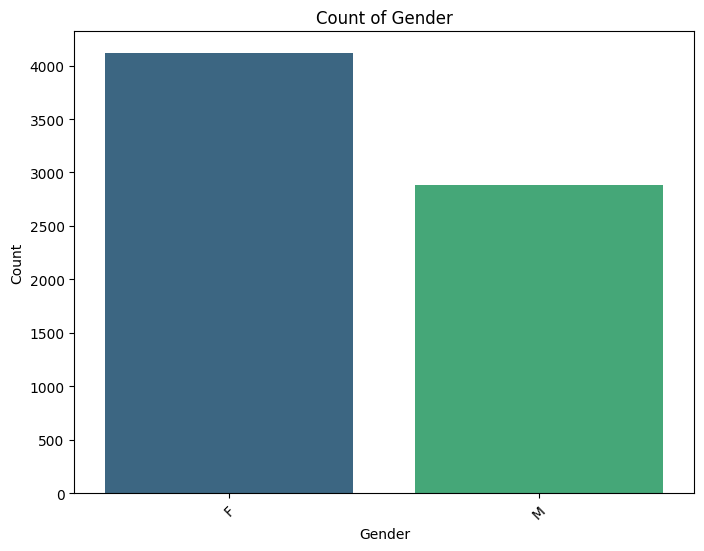

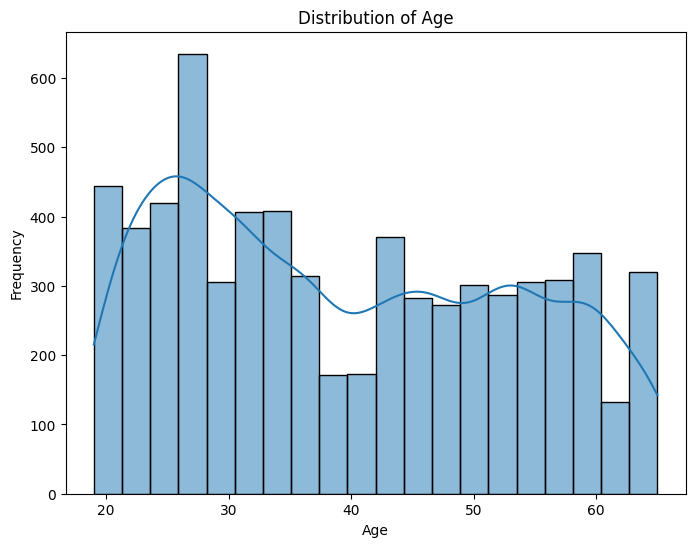

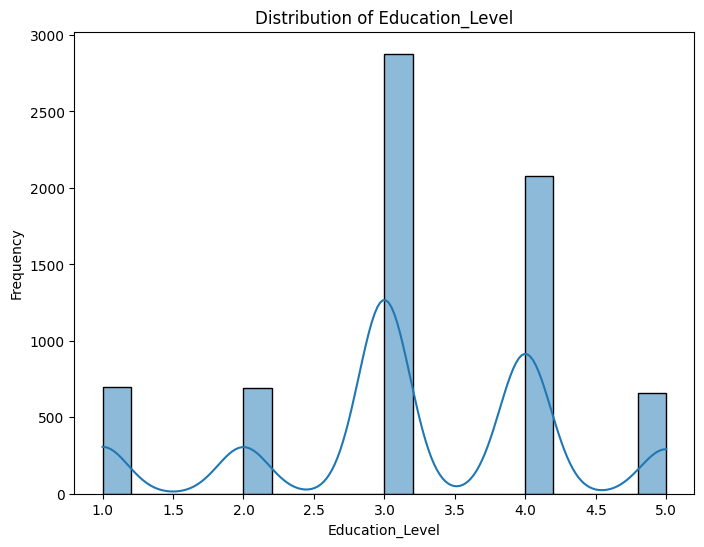

<ipython-input-25-8bd051b285fd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_train, palette='viridis')


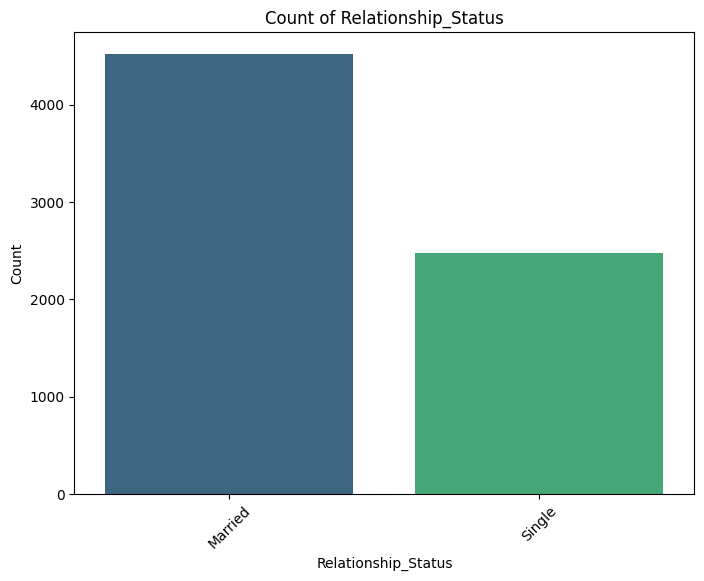

<ipython-input-25-8bd051b285fd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_train, palette='viridis')


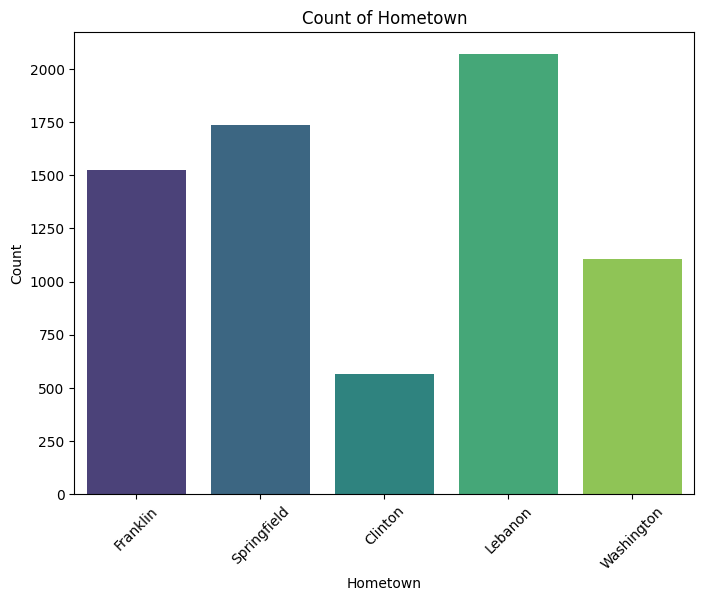

<ipython-input-25-8bd051b285fd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_train, palette='viridis')


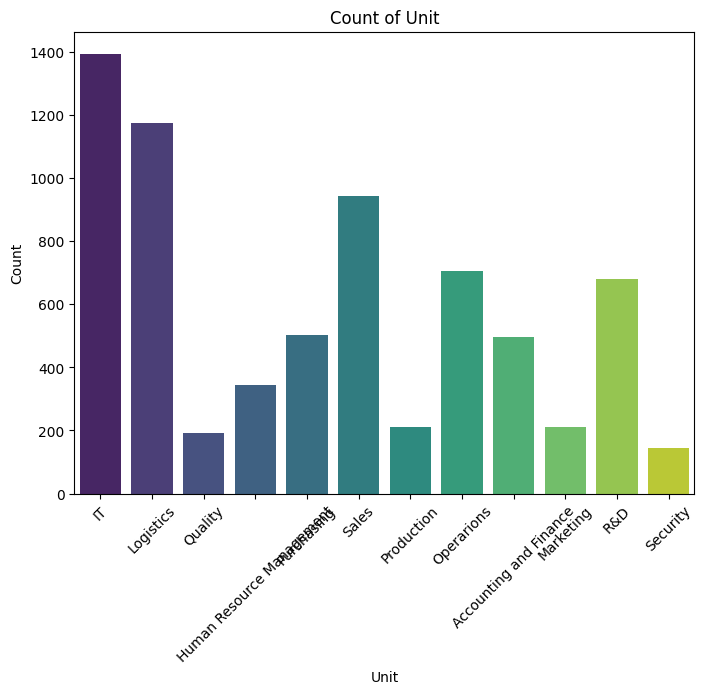

<ipython-input-25-8bd051b285fd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_train, palette='viridis')


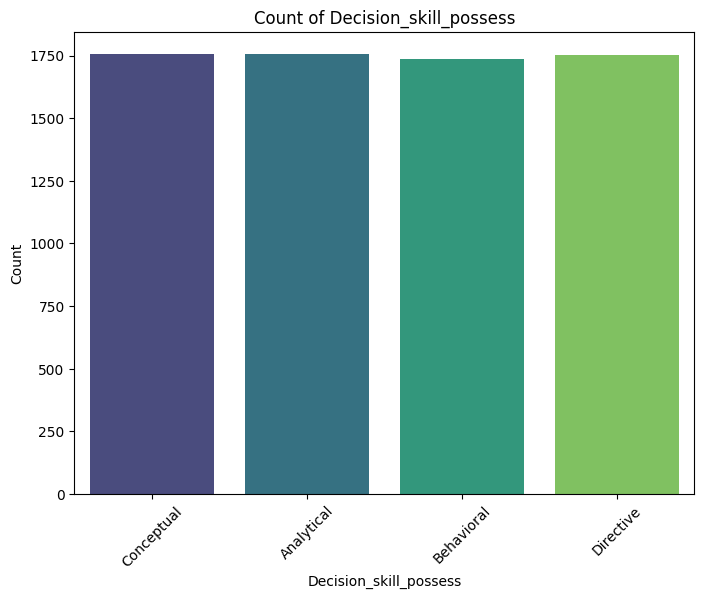

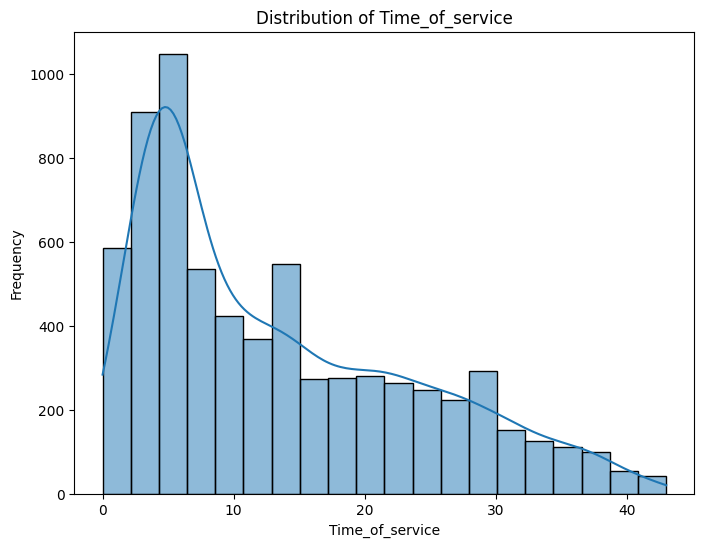

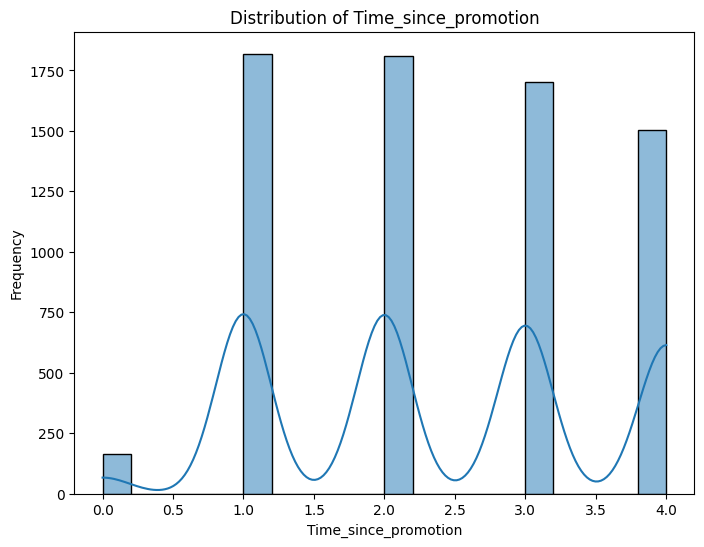

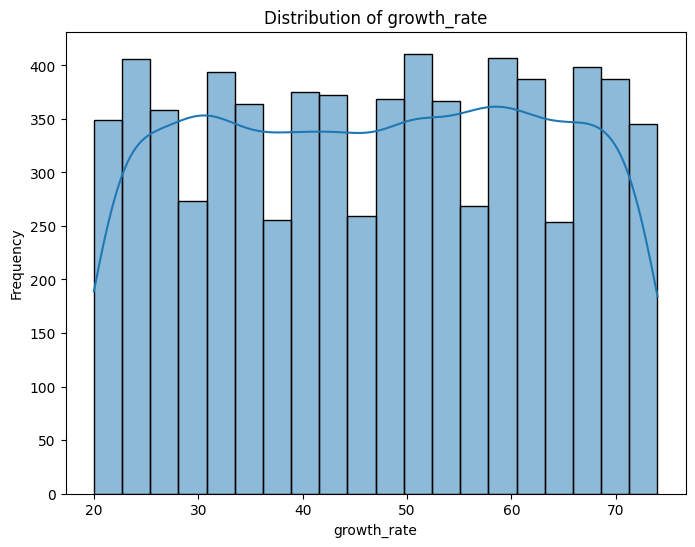

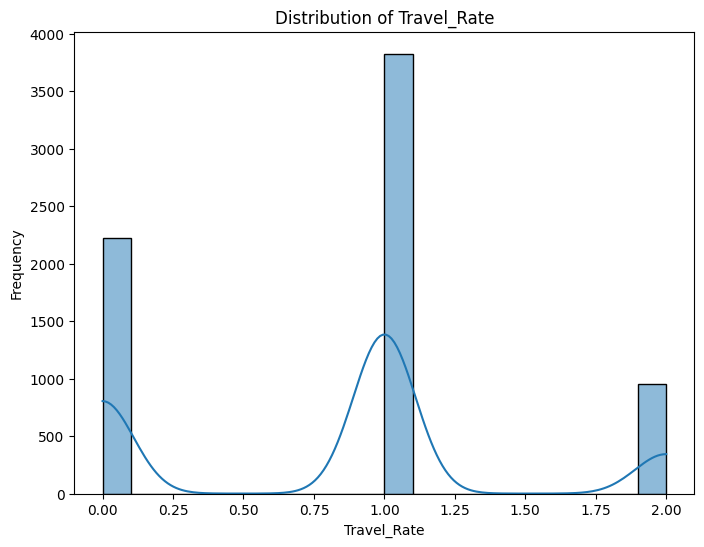

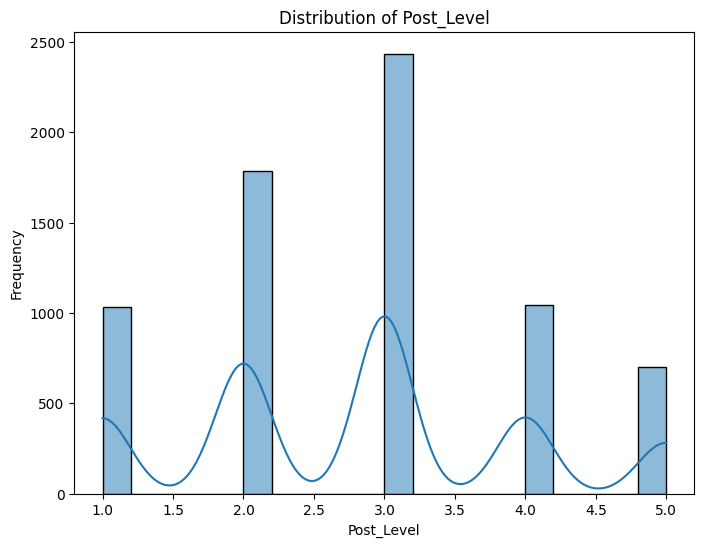

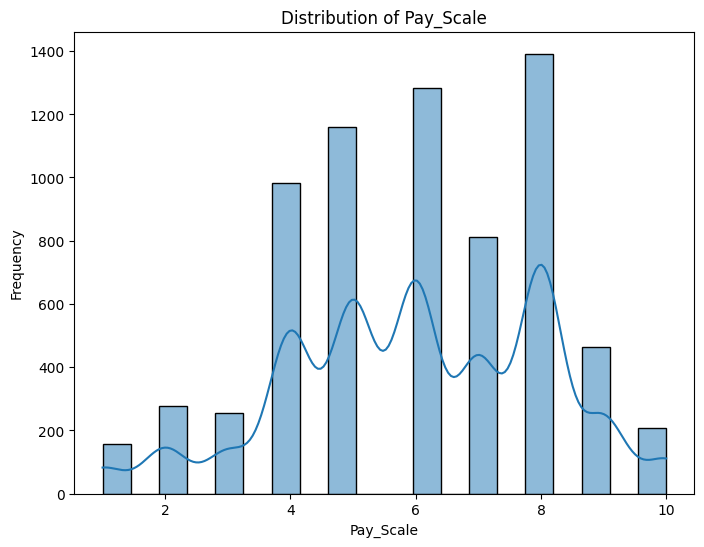

<ipython-input-25-8bd051b285fd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_train, palette='viridis')


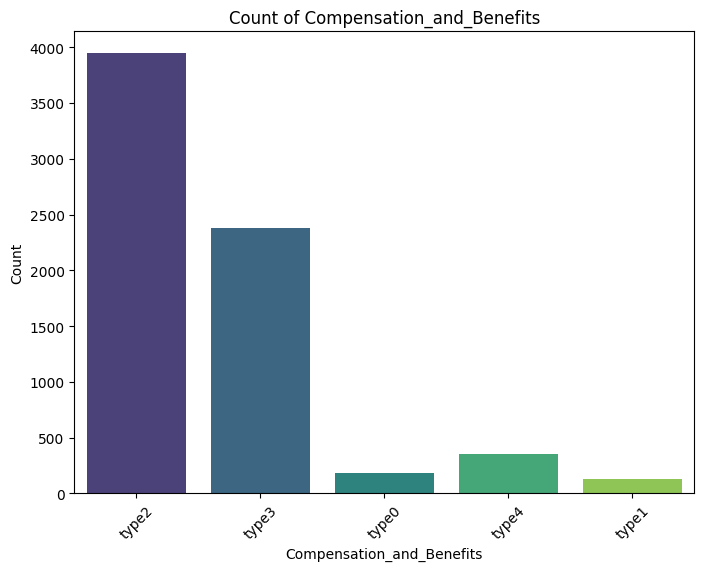

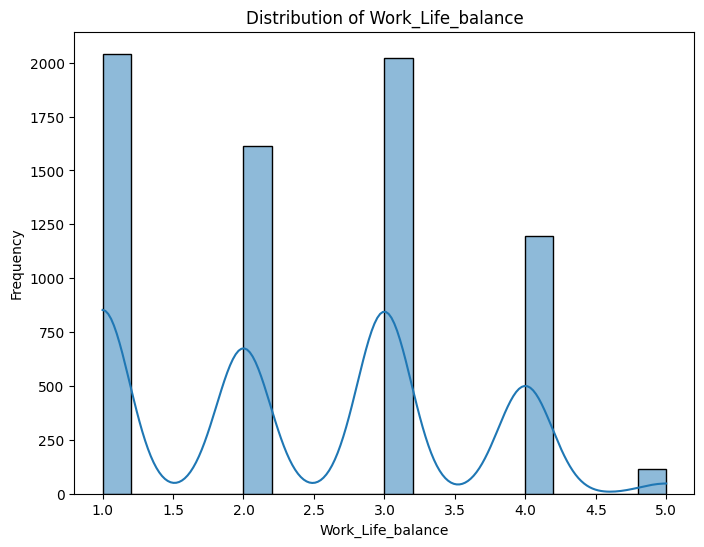

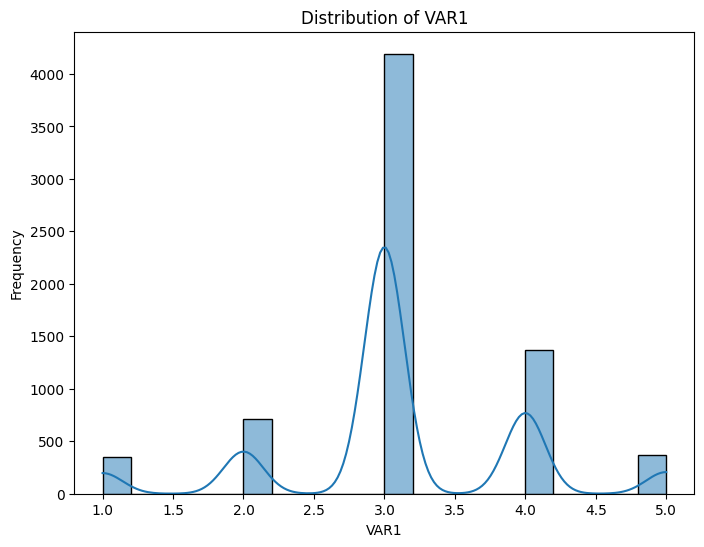

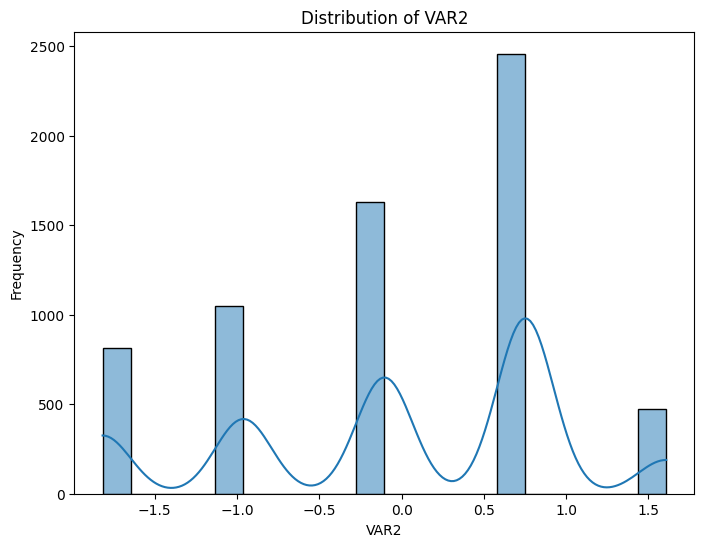

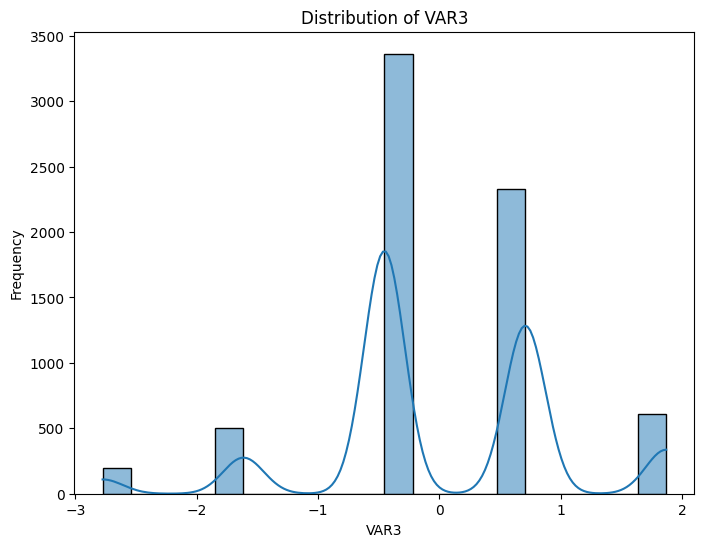

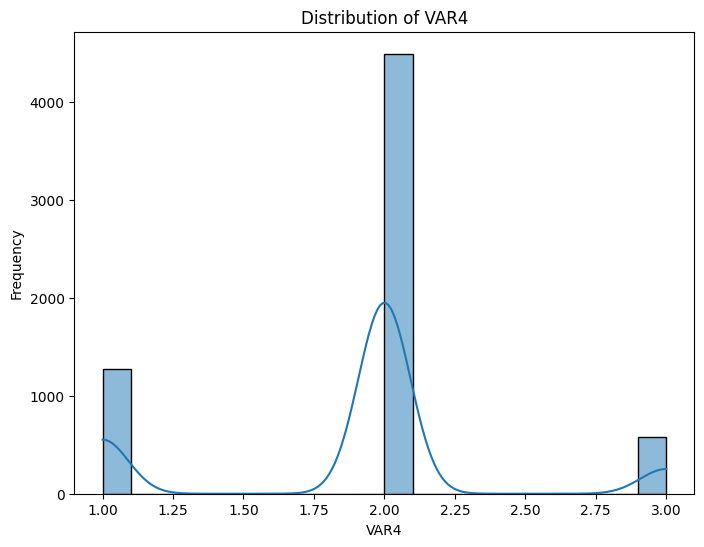

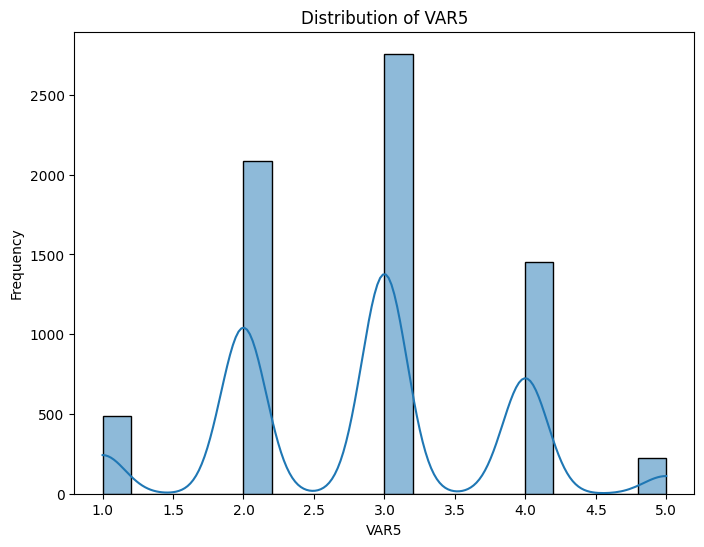

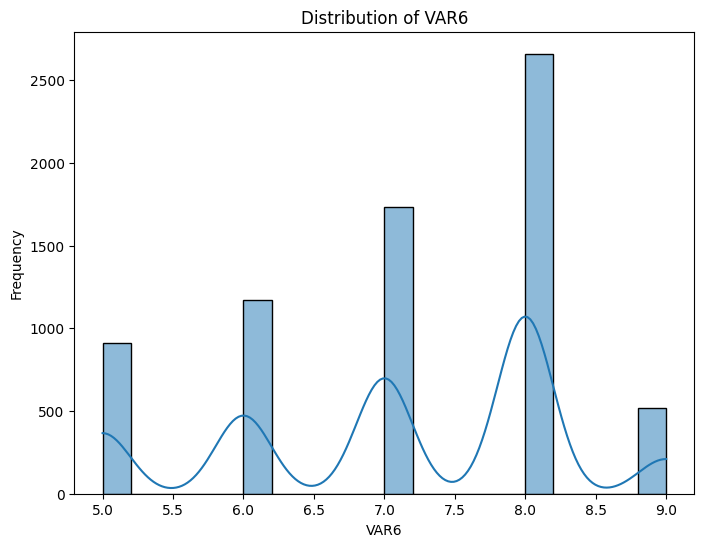

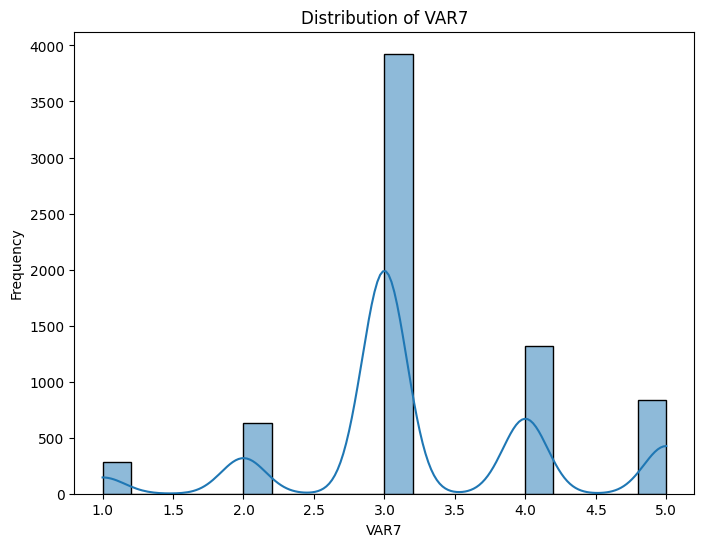

In [25]:
for column in data_train.columns:

    if column != 'Attrition_rate':

        column_dtype = data_train[column].dtype
        if column_dtype in ['int64', 'float64']:
            plt.figure(figsize=(8, 6))
            sns.histplot(data_train[column], bins=20, kde=True)
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.countplot(x=column, data=data_train, palette='viridis')
            plt.title(f'Count of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()


Bagian bawah ini adalah proses training nya, saya akan lakukan training dengan displit sekitar 20% untuk test dari dataset training untuk buat model dan cek evaluasi. Kemudian jika model sudah jadi akan saya ujicoba modelnya dengan dataset test.

Pada Bagian bawah ini ada Imputer yaitu simple imputer gunanya untuk mengisi missing value dengan strategy mean atau most_frequent seperti yang saya bilang diatas dimana value yang missing itu tidak dihapus karena akan diisi dengan simple imputernya

In [27]:
X = data_train.drop(columns=['Attrition_rate'])
y = data_train['Attrition_rate']
#Bagian bawah ini itu kalo ada yg null itu nanti diganti ke mean dari kolomnya
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
#Bagian bawah ini tu untuk kalau ada yg null itu diambil dan di ganti frequent nya
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Untuk Model dari Algoritma Estimasi aku menggunakan Gradient Boosting Regressor. Attrition_rate itu continous valuenya sehingga GradientBoostingRegressor itu bisa digunakan untuk Estimasi nilai nya dari features yang ada. GradientBoostingRegressor sendiri itu adalah algoritma machine learning yang digunakan untuk regression. Dalam gradient boosting, model- model yang lemah itu digabungin secara berurutan untuk buat model yang kuat. membangung ensemble dari decision tree, dimana tiap tree itu memprediksi residual dari tree sebelumnya, prediksi kahir itu adalah jumlah dari prediksi dari semua tree dalam ensemble.

In [28]:
#ini pakai Gradient Boosting Regressor sebagai model nya
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
print(f'Mean Absolute Error (Gradient Boosting): {mae_gb}')
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (Gradient Boosting): 0.1276709407729785
Mean Squared Error (MSE): 0.03556440885164675


Model memiliki MAE 12% dan Mse 0.035 yang berarti ada erorr sekitar 12% dari hasil aslinya.
MAE itu menghitung rata rata absolute perbedaan antara value aktual dan predicted, karena hasilnya 12% maka prediksi dari model itu meleset sekitar 12% dari aslinya

Test hasil model dengan dataset_test, hasil yg dihasilkan adalah attrition rate yang dapat digunakan untuk mencari retention rate dari karyawan -karyawan dengan 1-attrition rate. Nah untuk menganalisa Retensi karyawan dari dataset test itu kita lakukan prediksi terhadap semua attrition rate karyawan yang ada kemudian dijumlahkan dan dibagi dengan jumlah karyawan. Kita akan mendapatkan Attrition rate karyawan-karyawan yang ada di dataset test, kemudian kita 1-hasil attrirate tadi maka akan menemukan Retention rate yang dicari.

In [21]:
data_test = data_test.drop(columns=['Employee_ID'],errors='ignore')
prediction = gb_model.predict(data_test)
i=0
for predictions in prediction:
  i+=1
atr = prediction.sum()/i
reten = 1 - atr
print("Attrition Rate of Employees: {:.2f}%".format(atr*100))
print("Retention Rate of Employees: {:.2f}%".format(reten*100))

Attrition Rate of Employees: 19.08%
Retention Rate of Employees: 80.92%


In [22]:
with open('model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

In [23]:
shutil.copy('model.pkl', '/content/drive/MyDrive/UAS/AI/')

'/content/drive/MyDrive/UAS/AI/model.pkl'